***2. Preprocessing_Basic Traits***

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_nyc = pd.read_csv('nyc_with_distances.csv')

C:\Users\sylvi\AppData\Local\Temp\ipykernel_992\3094127854.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nyc = pd.read_csv('nyc_with_distances.csv')


In [4]:
print(df_nyc.isnull().sum())

id                                                                0
log_price                                                         0
property_type                                                     0
room_type                                                         0
amenities                                                         0
accommodates                                                      0
bathrooms                                                         0
bed_type                                                          0
cancellation_policy                                               0
cleaning_fee                                                      0
city                                                              0
description                                                       0
first_review                                                      0
host_has_profile_pic                                              0
host_identity_verified                          

Price

In [6]:
log_price_stats = df_nyc['log_price'].describe()
print("Basic description--log_price：")
print(log_price_stats)

Basic description--log_price：
count    17853.000000
mean         4.719665
std          0.647487
min          1.609438
25%          4.248495
50%          4.653960
75%          5.164786
max          7.600402
Name: log_price, dtype: float64


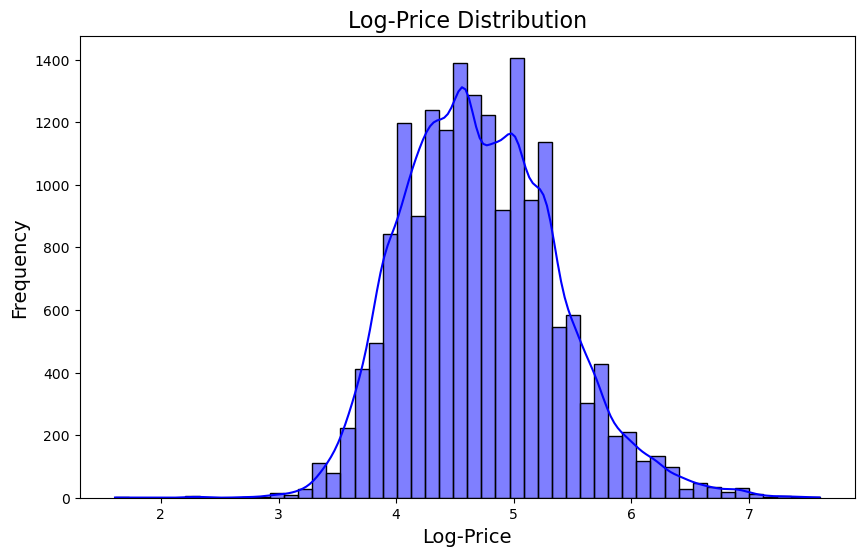

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_nyc['log_price'], bins=50, kde=True, color='blue')
plt.title("Log-Price Distribution", fontsize=16)
plt.xlabel("Log-Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

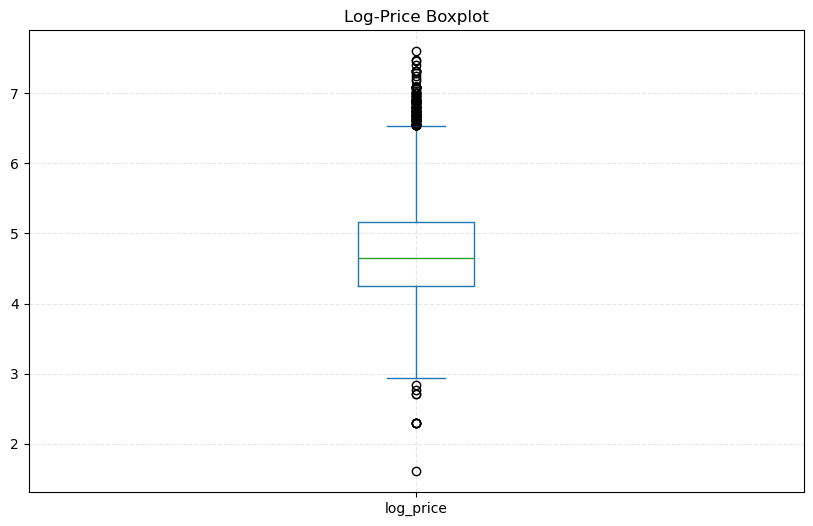

In [8]:
plt.figure(figsize=(10, 6))
df_nyc['log_price'].plot.box(title='Log-Price Boxplot')
plt.grid(linestyle="--", alpha=0.3)
plt.show()

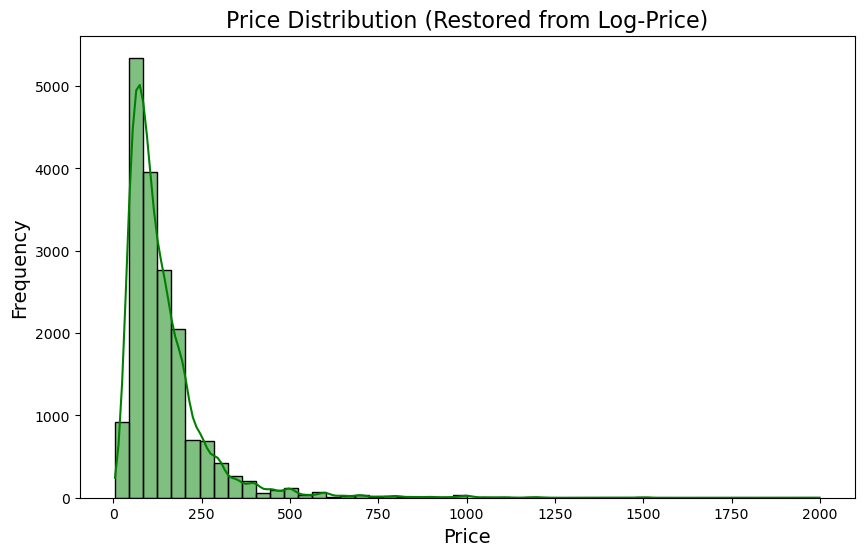

In [9]:
df_nyc['price'] = np.exp(df_nyc['log_price'])
plt.figure(figsize=(10, 6))
sns.histplot(df_nyc['price'], bins=50, kde=True, color='green')
plt.title("Price Distribution (Restored from Log-Price)", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [10]:
price_stats = df_nyc['price'].describe()
print("Basic statistics of the restored price:")
print(price_stats)

Basic statistics of the restored price:
count    17853.000000
mean       141.163558
std        121.157093
min          5.000000
25%         70.000000
50%        105.000000
75%        175.000000
max       1999.000001
Name: price, dtype: float64


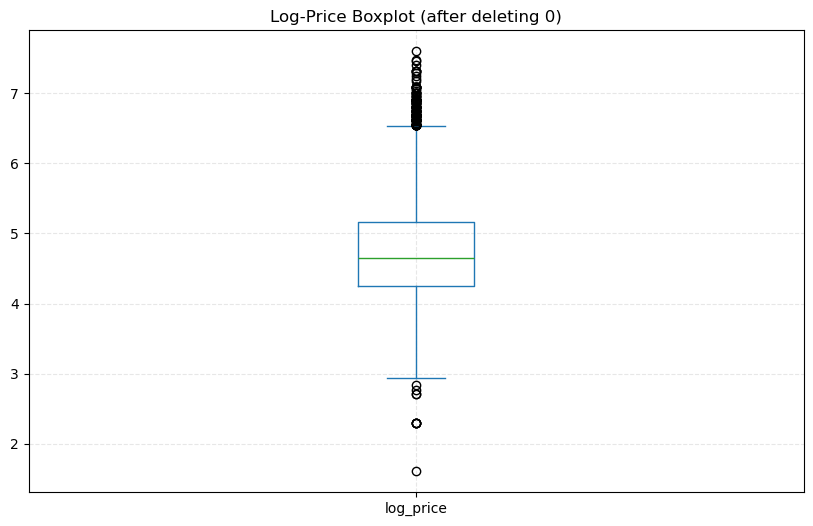

In [11]:
df_nyc = df_nyc[(df_nyc['log_price'] != 0)]   #delete 0
plt.figure(figsize=(10, 6))
df_nyc['log_price'].plot.box(title='Log-Price Boxplot (after deleting 0)')
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [12]:
df_nyc.to_csv('nyc_with_distances.csv', index=False)

print(f"The cleaned data has been saved and overwritten to the original file：{'nyc_with_distances.csv'}")

The cleaned data has been saved and overwritten to the original file：nyc_with_distances.csv


In [13]:
df_nyc = pd.read_csv('nyc_with_distances.csv')

C:\Users\sylvi\AppData\Local\Temp\ipykernel_992\3094127854.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nyc = pd.read_csv('nyc_with_distances.csv')


                 price  accommodates  bedrooms      beds  bathrooms
price         1.000000      0.592593  0.480019  0.497628   0.373356
accommodates  0.592593      1.000000  0.681815  0.838367   0.374912
bedrooms      0.480019      0.681815  1.000000  0.696092   0.431561
beds          0.497628      0.838367  0.696092  1.000000   0.393282
bathrooms     0.373356      0.374912  0.431561  0.393282   1.000000


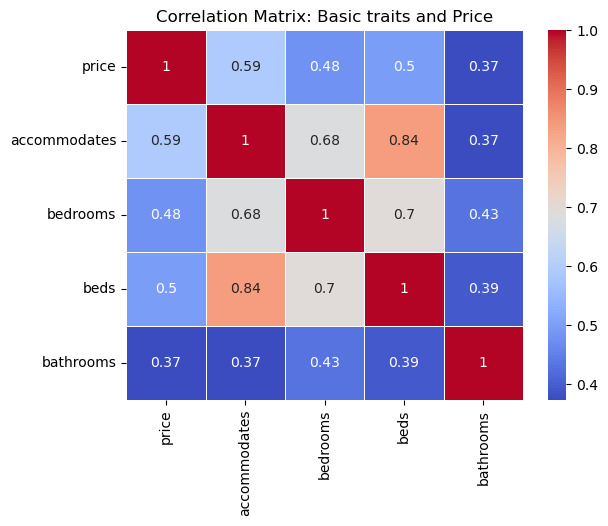

In [14]:
correlation_matrix = df_nyc[['price', 'accommodates', 'bedrooms','beds','bathrooms']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Basic traits and Price')
plt.show()

Accomodates

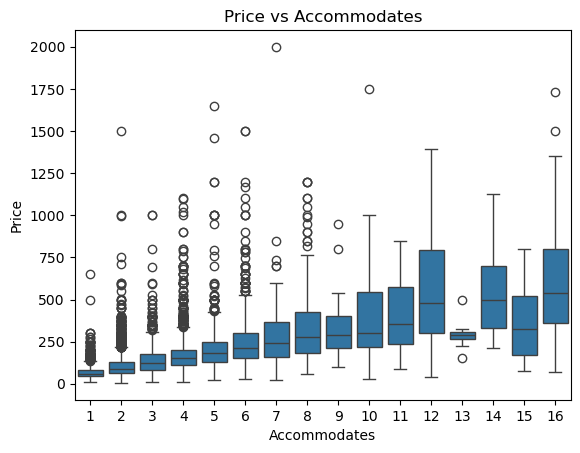

In [16]:
sns.boxplot(data=df_nyc, x='accommodates', y='price')
plt.title("Price vs Accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.show()

Bathrooms

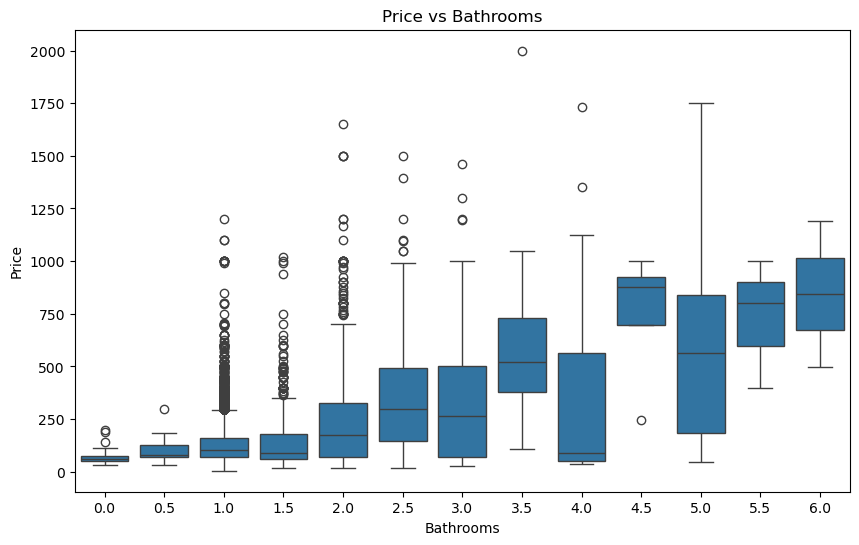

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_nyc, x='bathrooms', y='price')
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

bedrooms

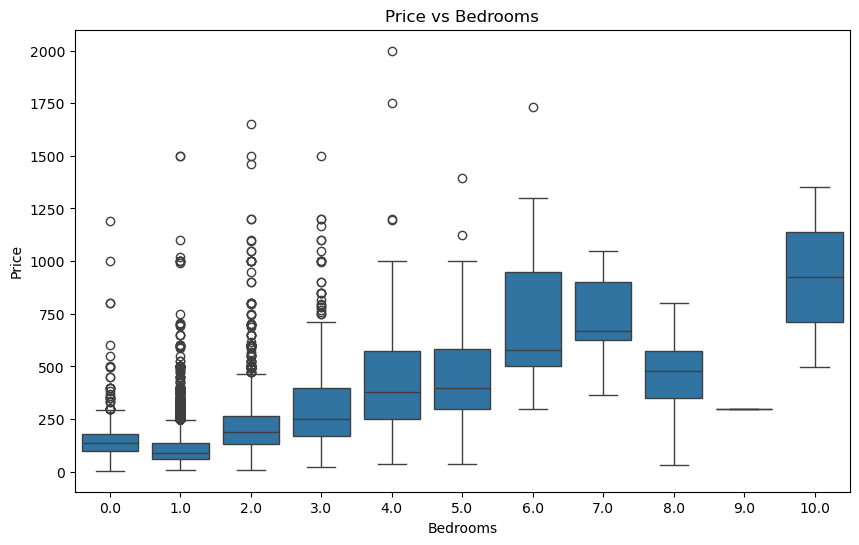

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_nyc, x='bedrooms', y='price')
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

beds

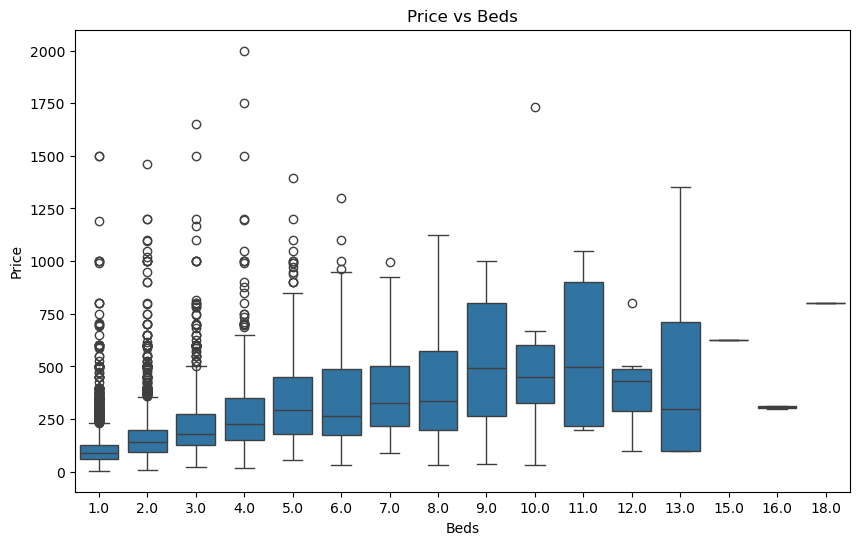

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_nyc, x='beds', y='price')
plt.title('Price vs Beds')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

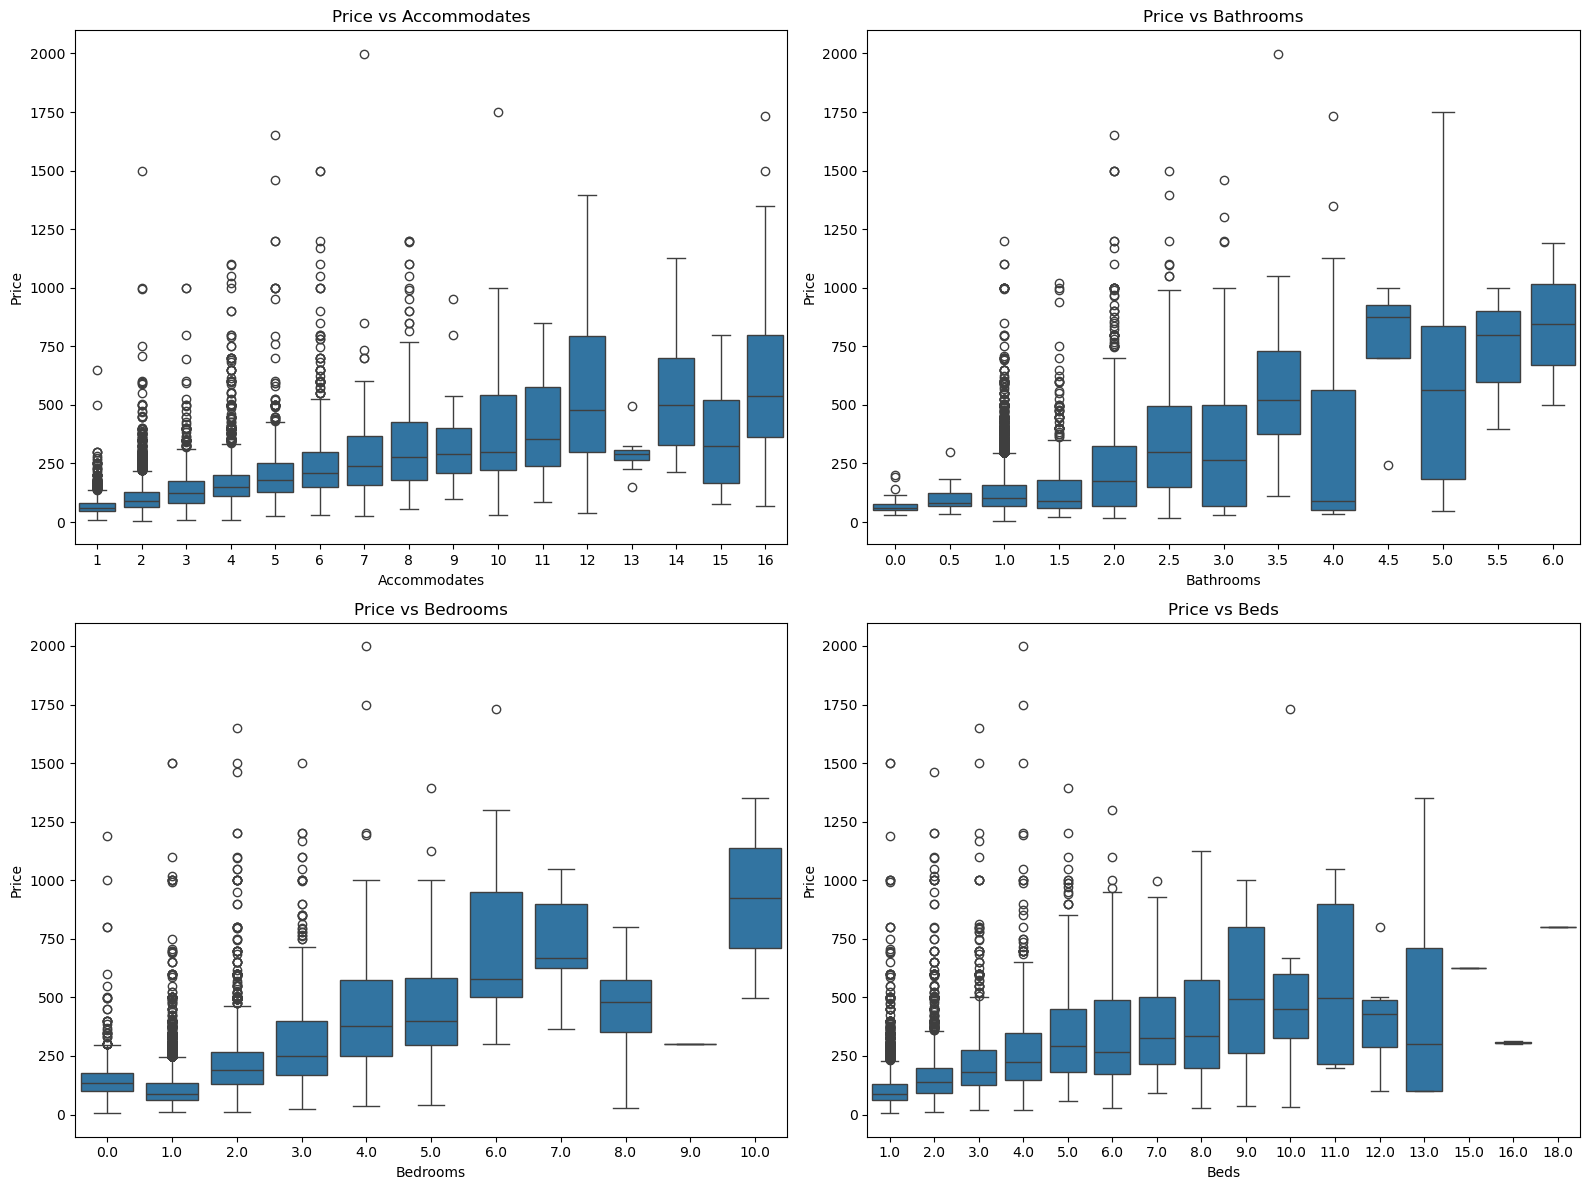

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  

# 1：Price vs Accommodates
sns.boxplot(data=df_nyc, x='accommodates', y='price', ax=axes[0, 0])
axes[0, 0].set_title("Price vs Accommodates")
axes[0, 0].set_xlabel("Accommodates")
axes[0, 0].set_ylabel("Price")

# 2：Price vs Bathrooms
sns.boxplot(data=df_nyc, x='bathrooms', y='price', ax=axes[0, 1])
axes[0, 1].set_title("Price vs Bathrooms")
axes[0, 1].set_xlabel("Bathrooms")
axes[0, 1].set_ylabel("Price")

# 3：Price vs Bedrooms
sns.boxplot(data=df_nyc, x='bedrooms', y='price', ax=axes[1, 0])
axes[1, 0].set_title("Price vs Bedrooms")
axes[1, 0].set_xlabel("Bedrooms")
axes[1, 0].set_ylabel("Price")

# 4：Price vs Beds
sns.boxplot(data=df_nyc, x='beds', y='price', ax=axes[1, 1])
axes[1, 1].set_title("Price vs Beds")
axes[1, 1].set_xlabel("Beds")
axes[1, 1].set_ylabel("Price")

plt.tight_layout()  
plt.show()

Accomodates & bedrooms/bathrooms/beds

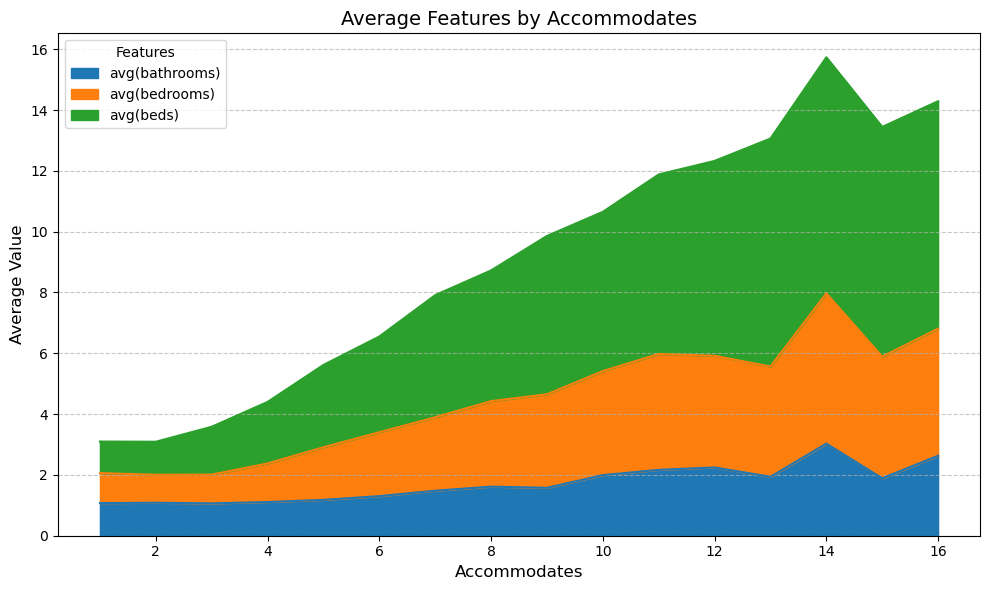

In [25]:
df_by_acc = df_nyc.groupby('accommodates').agg({
    'bathrooms': 'mean',
    'bedrooms': 'mean',
    'beds': 'mean'
}).reset_index()
df_by_acc.columns = ['accommodates', 'avg(bathrooms)', 'avg(bedrooms)', 'avg(beds)']

df_by_acc.plot(
    kind='area', 
    x='accommodates', 
    y=df_by_acc.columns[1:],  
    stacked=True,  
    figsize=(10, 6)
)

plt.title('Average Features by Accommodates', fontsize=14)
plt.xlabel('Accommodates', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Features', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Property type

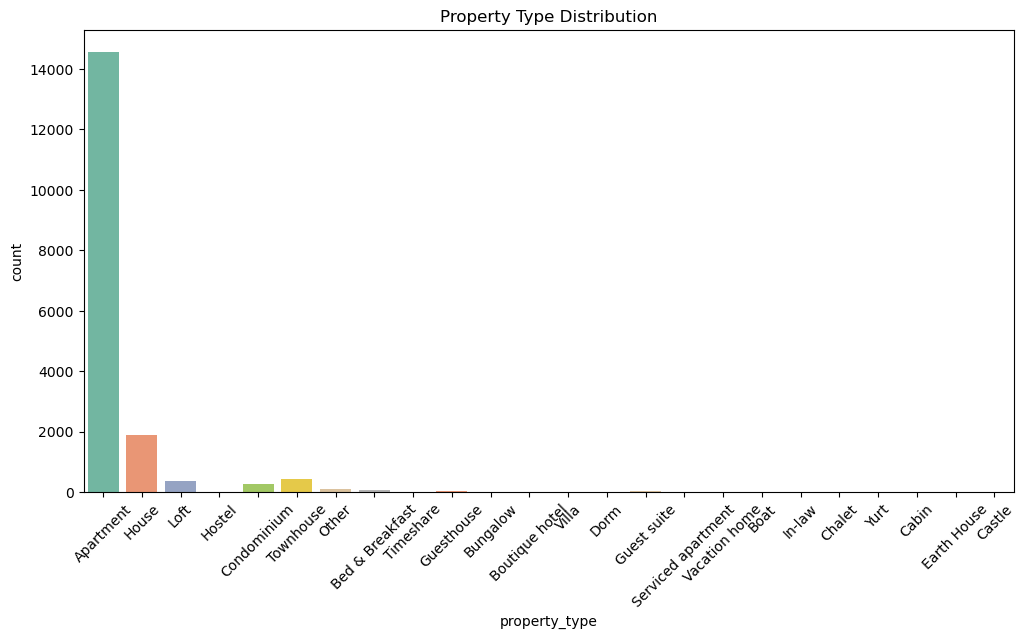

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', data=df_nyc, hue='property_type', palette='Set2', legend=False)
plt.title('Property Type Distribution')
plt.xticks(rotation=45)  
plt.show()

C:\Users\sylvi\AppData\Local\Temp\ipykernel_992\4243015488.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_counts.index, y=property_counts.values, palette='Set2')


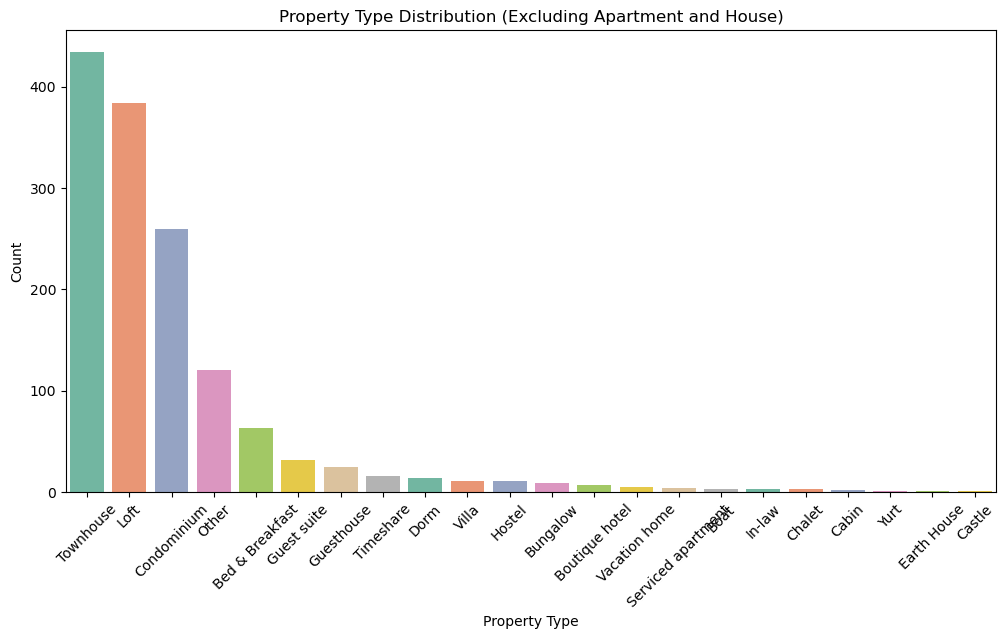

In [28]:
df_other = df_nyc[(df_nyc['property_type'] != 'Apartment') & (df_nyc['property_type'] != 'House')]

property_counts = df_other['property_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, palette='Set2')

plt.title('Property Type Distribution (Excluding Apartment and House)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Property Type')
plt.show()

In [29]:
property_type_counts = df_nyc['property_type'].value_counts()

top_5_property_types = property_type_counts.head(5)

print(top_5_property_types)

property_type
Apartment      14559
House           1885
Townhouse        434
Loft             384
Condominium      260
Name: count, dtype: int64


Dorm: 14
Villa: 11
Hostel: 11
Bungalow: 9
Boutique hotel: 7
Vacation home: 5
Serviced apartment: 4
Boat: 3
In-law: 3
Chalet: 3
Cabin: 2
Yurt: 1
Earth House: 1
Castle: 1

Property type distribution after merging low-frequency categories:
property_type
Apartment              14559
House                   1885
Townhouse                434
Loft                     384
Condominium              260
Other                    120
other_low_frequency       75
Bed & Breakfast           63
Guest suite               32
Guesthouse                25
Timeshare                 16
Name: count, dtype: int64


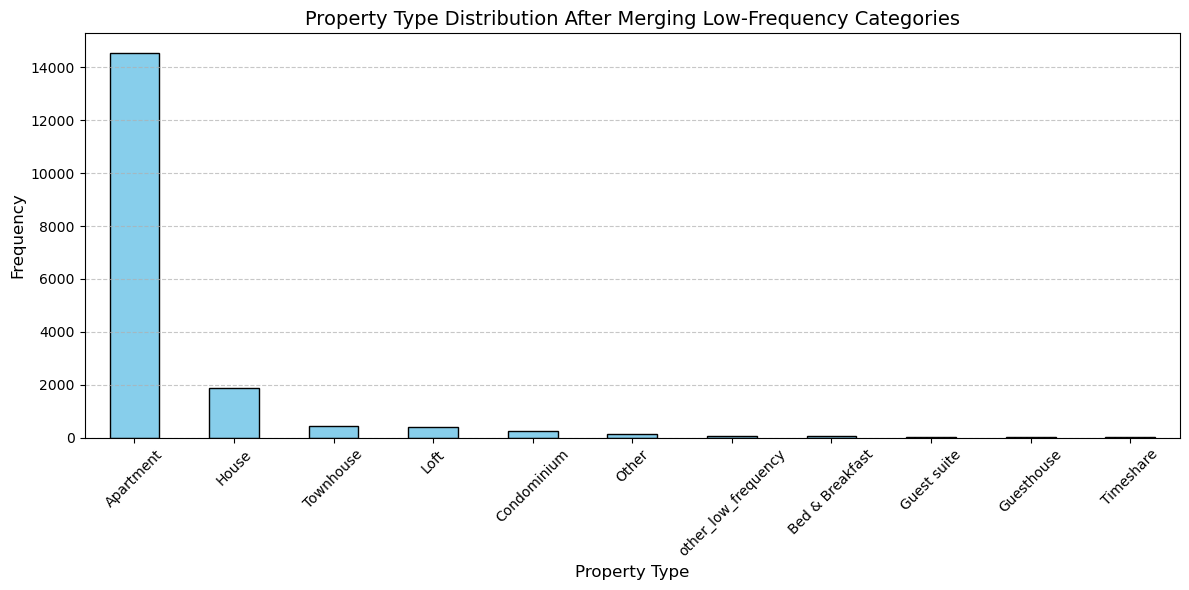

In [30]:
top_10_property_types = property_type_counts.head(10)

low_frequency_types = property_type_counts[~property_type_counts.index.isin(top_10_property_types.index)].index
for property_type in low_frequency_types:
    count = property_type_counts[property_type]
    print(f"{property_type}: {count}")

df_nyc['property_type'] = df_nyc['property_type'].apply(
    lambda x: x if x in top_10_property_types.index else 'other_low_frequency'
)

property_type_counts_after_merge = df_nyc['property_type'].value_counts()

print("\nProperty type distribution after merging low-frequency categories:")
print(property_type_counts_after_merge)

plt.figure(figsize=(12, 6))
property_type_counts_after_merge.sort_values(ascending=False).plot(
    kind='bar', color='skyblue', edgecolor='black'
)
plt.title('Property Type Distribution After Merging Low-Frequency Categories', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Room-type

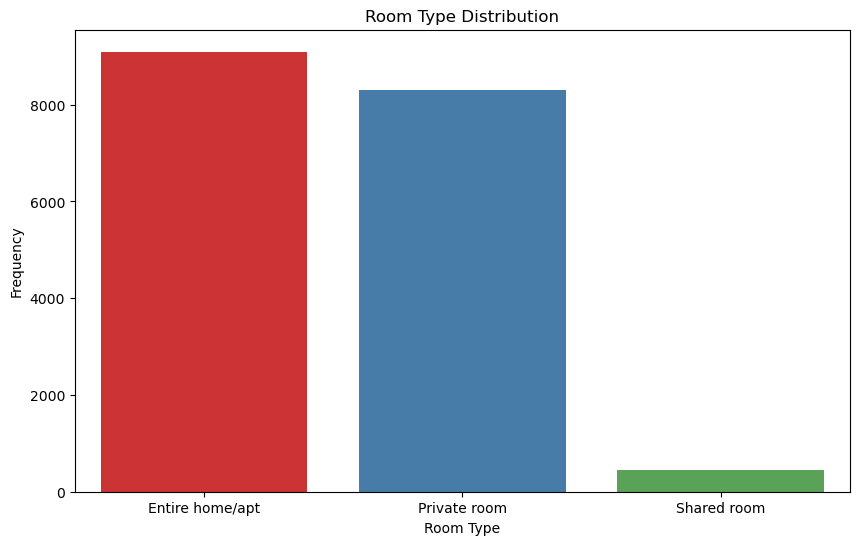

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df_nyc, hue='room_type', palette='Set1', legend=False)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.show()

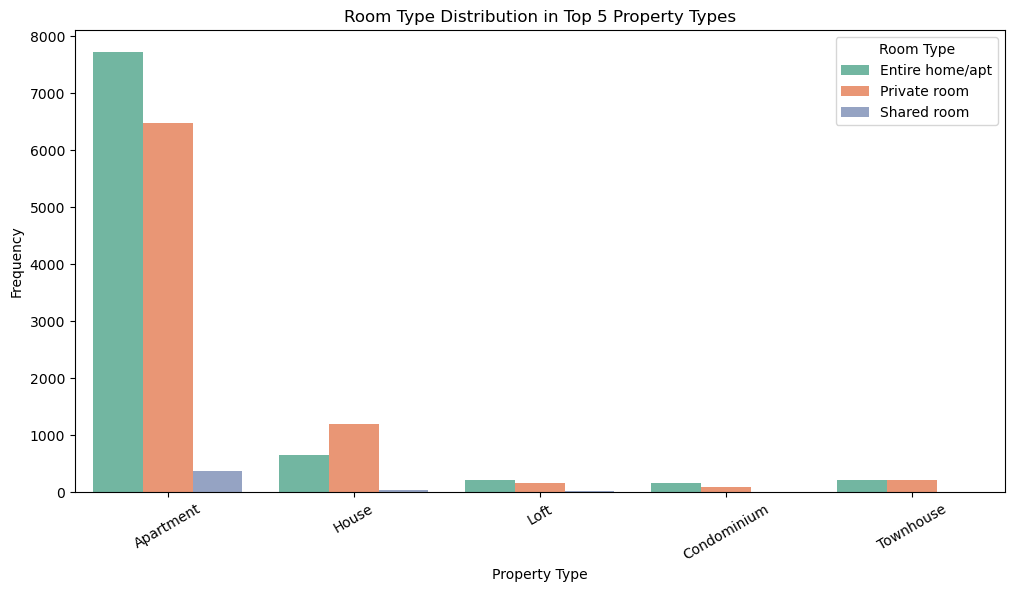

In [33]:
top_5_property_types = ['Apartment', 'House', 'Townhouse', 'Loft', 'Condominium']
df_top5 = df_nyc[df_nyc['property_type'].isin(top_5_property_types)]

plt.figure(figsize=(12, 6))
sns.countplot(
    x='property_type',
    hue='room_type',
    data=df_top5,
    palette='Set2'
)

plt.title('Room Type Distribution in Top 5 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.legend(title='Room Type')
plt.xticks(rotation=30)
plt.show()

bed type

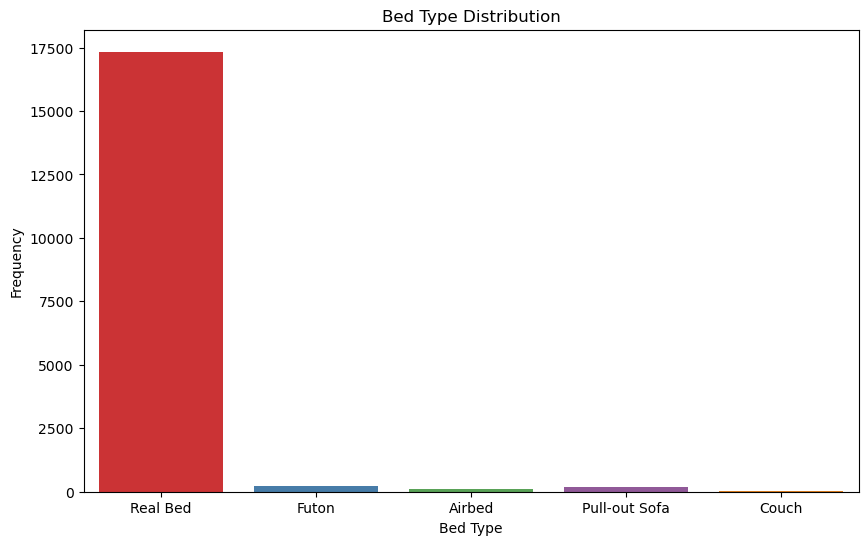

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bed_type', data=df_nyc, hue='bed_type', palette='Set1', legend=False)
plt.title('Bed Type Distribution')
plt.xlabel('Bed Type')
plt.ylabel('Frequency')
plt.show()

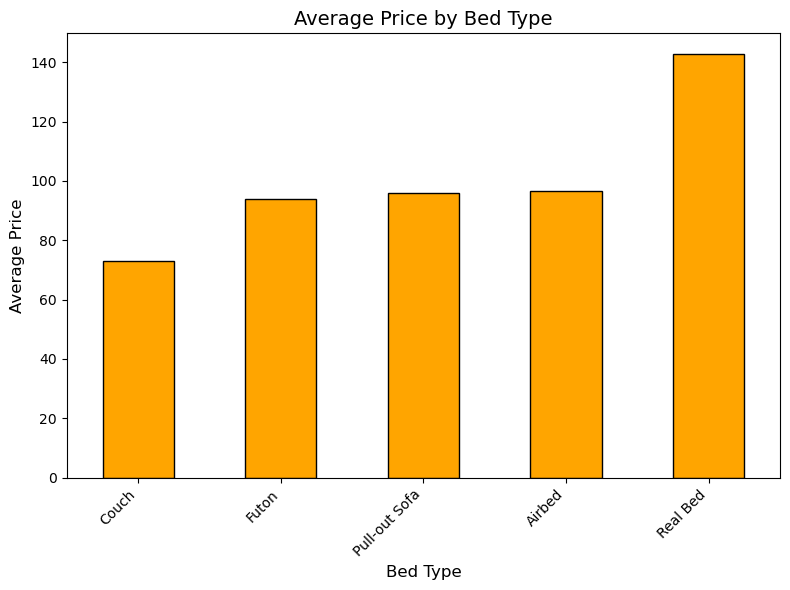

In [64]:
bed_type_price = df_nyc.groupby('bed_type')['price'].mean().sort_values()

bed_type_price.plot(kind='bar', figsize=(8, 6), color='orange', edgecolor='black')
plt.title("Average Price by Bed Type", fontsize=14)
plt.xlabel("Bed Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()